In [8]:
import numpy as np
from tensorflow.keras import layers,models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [9]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
y_train = to_categorical(y_train,10) 
y_test = to_categorical(y_test, 10)

In [13]:
base_model = InceptionV3(weights='imagenet',include_top=False,input_shape=(96,96,3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [16]:
base_model.trainable = False

In [18]:
model = models.Sequential()

model.add(layers.UpSampling2D(size=(3,3),interpolation='bilinear')) # Resize 32x32 to 96x96
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation='softmax'))

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=50,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 596s 762ms/step - accuracy: 0.7071 - loss: 0.8357 - val_accuracy: 0.6918 - val_loss: 0.9219
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.7167 - loss: 0.8040

In [24]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 194ms/step - accuracy: 0.6774 - loss: 0.9243
Test accuracy: 0.6804999709129333


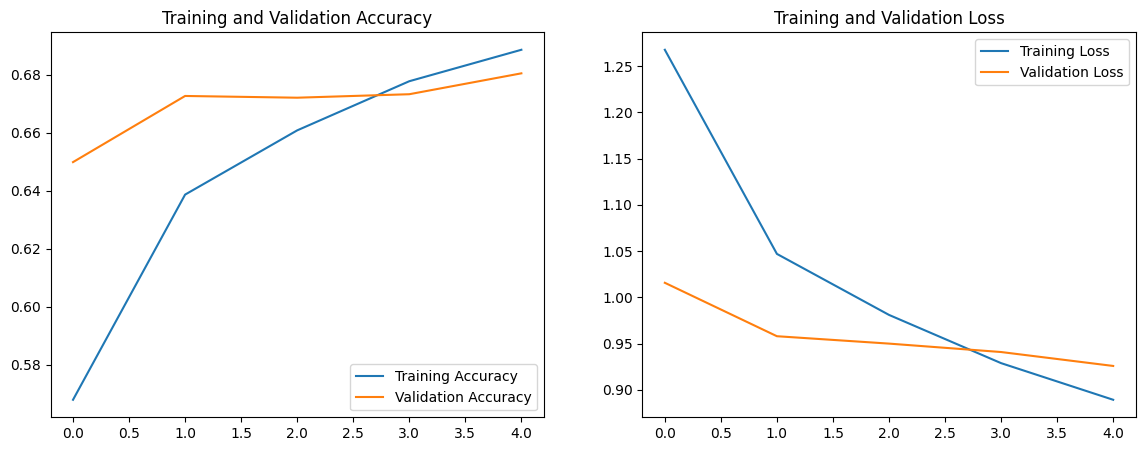

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()